# Morning: Introduction to Time Series Analysis
The simplest demonstration of temporal dependence is seen by considering a univariate time series $y(t)$. In our case, $y(t)$ may be the surface-level atmsopheric concentration of ozone at a single EPA air-quality station in Orange County.

In [49]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

## What generates the pattern?

## Is there a trend?

In [50]:
#-- Get El Nino data
sst = np.loadtxt('../data/detrend.nino34.ascii.txt',skiprows=1)
y = sst[:,2]
t = np.linspace(1950,2017,len(y))

#-- Linear Regression
X = np.column_stack((np.ones(len(t)),t))
#-- Now define model
model = sm.OLS(y, X)
#-- fit and display results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     24.61
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           8.55e-07
Time:                        01:22:23   Log-Likelihood:                -1070.2
No. Observations:                 807   AIC:                             2144.
Df Residuals:                     805   BIC:                             2154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6888      3.290      3.249      0.0

## Generate sample realizations (TO BE COMPLETED)

## The autocorrelation function

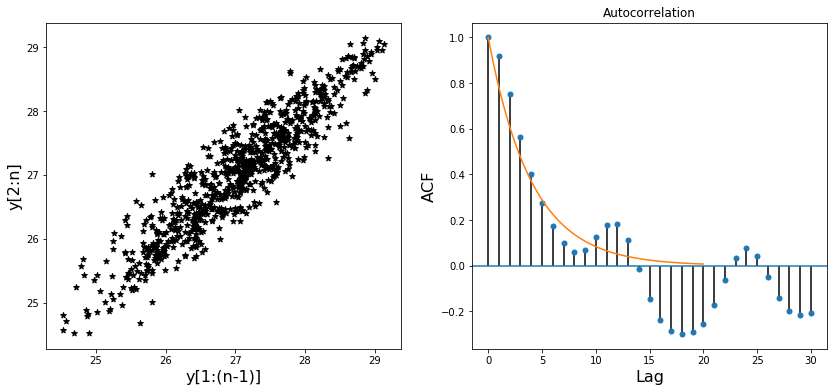

In [51]:
#-- Use the same sst data as above
n = len(y) # number of elements

#-- Set up figure
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)

#-- Plot scatter plot of values shifted by 1
ax1.scatter(y[1:(n-1)],y[2:n],color='k',marker='*')
ax1.set_xlabel('y[1:(n-1)]',fontsize=16)
ax1.set_ylabel('y[2:n]',fontsize=16)

#-- plot autocorrelation
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_acf(y,lags=30,alpha=None,ax=ax2)
ax2.plot(np.linspace(0,20),0.78**np.linspace(0,20))
ax2.set_xlabel('Lag', fontsize=16)
ax2.set_ylabel('ACF',fontsize=16)
plt.show()

## Generate various time series structures

## Simulation of slope estimation

## Simple trend analysis with autocorrelation (look into difference with R notebook)

In [52]:
#-- First fit our data and design matrix from above and get the residuals
ols_resid = sm.OLS(y,X).fit().resid
#-- Now we want to fit the residuals from the second element to the end vs. from the beginning to the second last 
#-- i.e shifting the residuals by 1 and fitting them
res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
#-- Get the estimate of correlation of residuals
rho = res_fit.params
print rho
#-- build Toeplitz matrix assuming neighbors are more correlated
order = toeplitz(np.arange(len(ols_resid)))
#-- get the autocorrelation structure
sigma = rho**order

#-- Now input the covariance matrix into generalized least squares
gls_model = sm.GLS(y, X, sigma=sigma)
gls_results = gls_model.fit()
print gls_results.summary()

[ 0.91881805]
                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            GLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     585.0
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           1.44e-97
Time:                        01:22:24   Log-Likelihood:                -309.81
No. Observations:                 807   AIC:                             623.6
Df Residuals:                     805   BIC:                             633.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3303     15.137      

# MORNING BREAK